# Choose 3 different classification techniques

## Read data

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [269]:
heart_disease = pd.read_csv('data/heart_disease/heart.csv')

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [4]:
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Show first rows of the data set

In [231]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [232]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


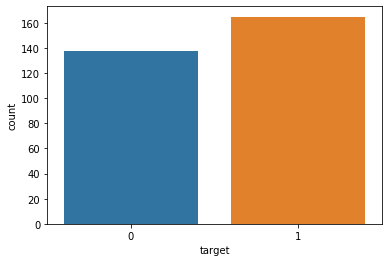

In [200]:
sns.countplot(x="target", data=heart_disease)
plt.show()

As the two classes are nearly evenly represented, there is no need to perform some sort of over-/undersampling.

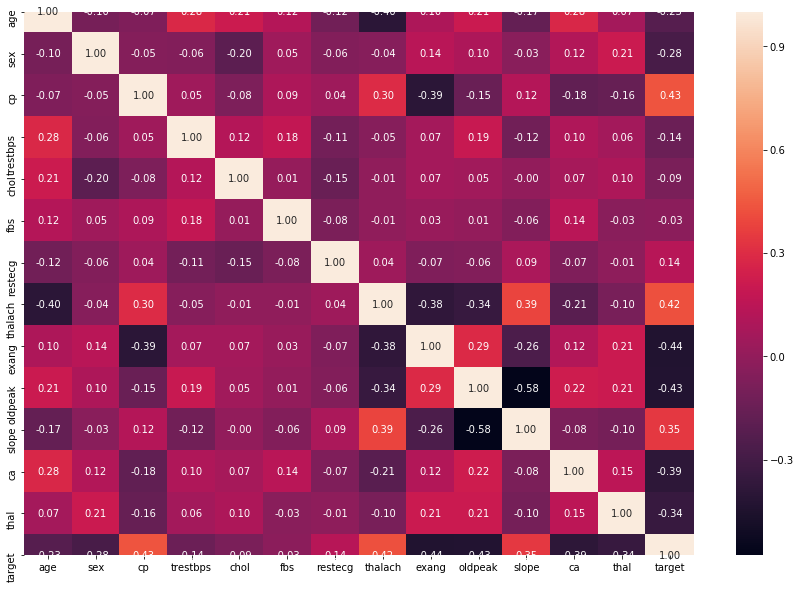

In [234]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_disease.corr(),annot=True,fmt='.2f')
plt.show()

There are a few categorical variables (sex, cp, fbs, restecg, slope, thal), therefore we do some one hot encoding.

In [270]:
heart_disease_one_hot_encoded = pd.get_dummies(data=heart_disease, columns=['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal'])
heart_disease_one_hot_encoded.head()

,age,trestbps,chol,thalach,exang,oldpeak,ca,target,sex_0,sex_1,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,0,2.3,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,0,3.5,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,0,1.4,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0,0.8,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,1,0.6,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


## Creating train and test data 

In [415]:
X = heart_disease.drop('target', axis=1).values
y = heart_disease['target'].values

#X = heart_disease_one_hot_encoded.drop('target', axis=1).values
#y = heart_disease_one_hot_encoded['target'].values

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [417]:
from sklearn.pipeline import Pipeline

# Select Features using RFECV
class PipelineRFE(Pipeline):
    # Source: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [418]:
import math
def plot_parameter_analysis(grid, params, param1, param2, params_base, method_name, function_name="accuracy", dataset_name="heartdisease"):
    scores_df = pd.DataFrame(grid.cv_results_)
    
    #print('params:', params.keys())
    grid_shape = [len(params[param]) for param in params.keys()] 
    scores_mean = [x for x in scores_df['mean_test_score']]
    scores_mean = np.array(scores_mean).reshape(grid_shape)
    scores_std = [x for x in scores_df['std_test_score']]
    scores_std = np.array(scores_std).reshape(grid_shape)
    
    #print('param1', param1)
    #print('param2', param2)
    print('init', scores_mean.shape)#, scores_mean)
    for ind, param in enumerate(params.keys()):
        if param is not param1 and param is not param2:
            #print('param', ind,':', param)
            #print('before', scores_mean.shape)#, scores_mean)
            delete_arr = np.array(range(len(params[param])))
            #print ('delete_array', delete_arr)
            delete_arr = delete_arr[[((params[param][p] is not params_base[param][0]) 
                                      if not isinstance(params_base[param][0], float) 
                                         and not isinstance(params[param][p], float)
                                      else math.isclose(params[param][p], params_base[param][0]))
                                     for p in range(len(params[param]))]]
        
            #print ('delete_array', delete_arr)
            scores_mean = np.delete(scores_mean, delete_arr, axis=ind)
            scores_std = np.delete(scores_std, delete_arr, axis=ind)
            #print('after', scores_mean.shape)#, scores_mean)
    scores_mean = np.squeeze(scores_mean)
    scores_std = np.squeeze(scores_std)
    #print('final score shape', scores_mean.shape, scores_mean)
    
    plt.figure(figsize=(20, 20))
    for ind, i in enumerate(params[param2]):
        if list(params.keys()).index(param1) < list(params.keys()).index(param2):
            plt.plot(params[param1], scores_mean[:,ind], label=param2+': ' + str(i))
            plt.plot(params[param1], scores_mean[:,ind] + scores_std[:,ind], color='black', alpha=0.3)
            plt.plot(params[param1], scores_mean[:,ind] - scores_std[:,ind], color='black', alpha=0.3)
        else:
            plt.plot(params[param1], scores_mean[ind], label=param2+': ' + str(i))
            plt.plot(params[param1], scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
            plt.plot(params[param1], scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
    plt.legend()
    plt.xlabel(param1)
    plt.ylabel('Mean score (' + function_name + ')')
    plt.title('Parameter analysis for ' + method_name + "\n" + dataset_name)
    plt.show()

## Logistic Regression
__Score history:__

|description | accuracy | macro avg | weighted avg |
|------------| -------- | --------- | ------------ |
| first try | 0.75 | 0.75, 0.74, 0.74 | 0.75, 0.75, 0.75 |
| with MinMaxScaler | 0.76 | 0.76, 0.75, 0.75 | 0.76, 0.76, 0.76 |
| with RobustScaler | 0.76 | 0.76, 0.75, 0.75 | 0.76, 0.76, 0.76 |
| one-hot encoded | 0.77 | 0.77, 0.77, 0.77 | 0.77, 0.77, 0.77 |
| with MinMaxScaler | 0.78 | 0.78, 0.78, 0.78 | 0.78, 0.78, 0.78 |
| with RobustScaler | 0.79 | 0.79, 0.79, 0.79 | 0.79, 0.79, 0.79 |



### Logistic Regression parameters

In [275]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix  

In [612]:
pipe_logreg = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression())
])

In [613]:
# create parameter list for ridge regression
params_logreg = {
    'logreg__C':[0.5, 0.6, 0.7, 1.1],
    'logreg__class_weight': [None, 'balanced']
}

In [614]:
# setup cross validation parameter grid search
grid_logreg = GridSearchCV(estimator=pipe_logreg,
    param_grid=params_logreg,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1)

In [615]:
# fitting model on training data
grid_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_rati

In [616]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_logreg.best_params_

{'logreg__C': 0.5, 'logreg__class_weight': None}

In [617]:
grid_logreg.score(X_test, y_test) 

0.7582417582417582

In [618]:
y_pred = grid_logreg.predict(X_test)

In [619]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.75      0.84      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



In [451]:
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

[[32  9]
 [10 40]]


init (4, 2)


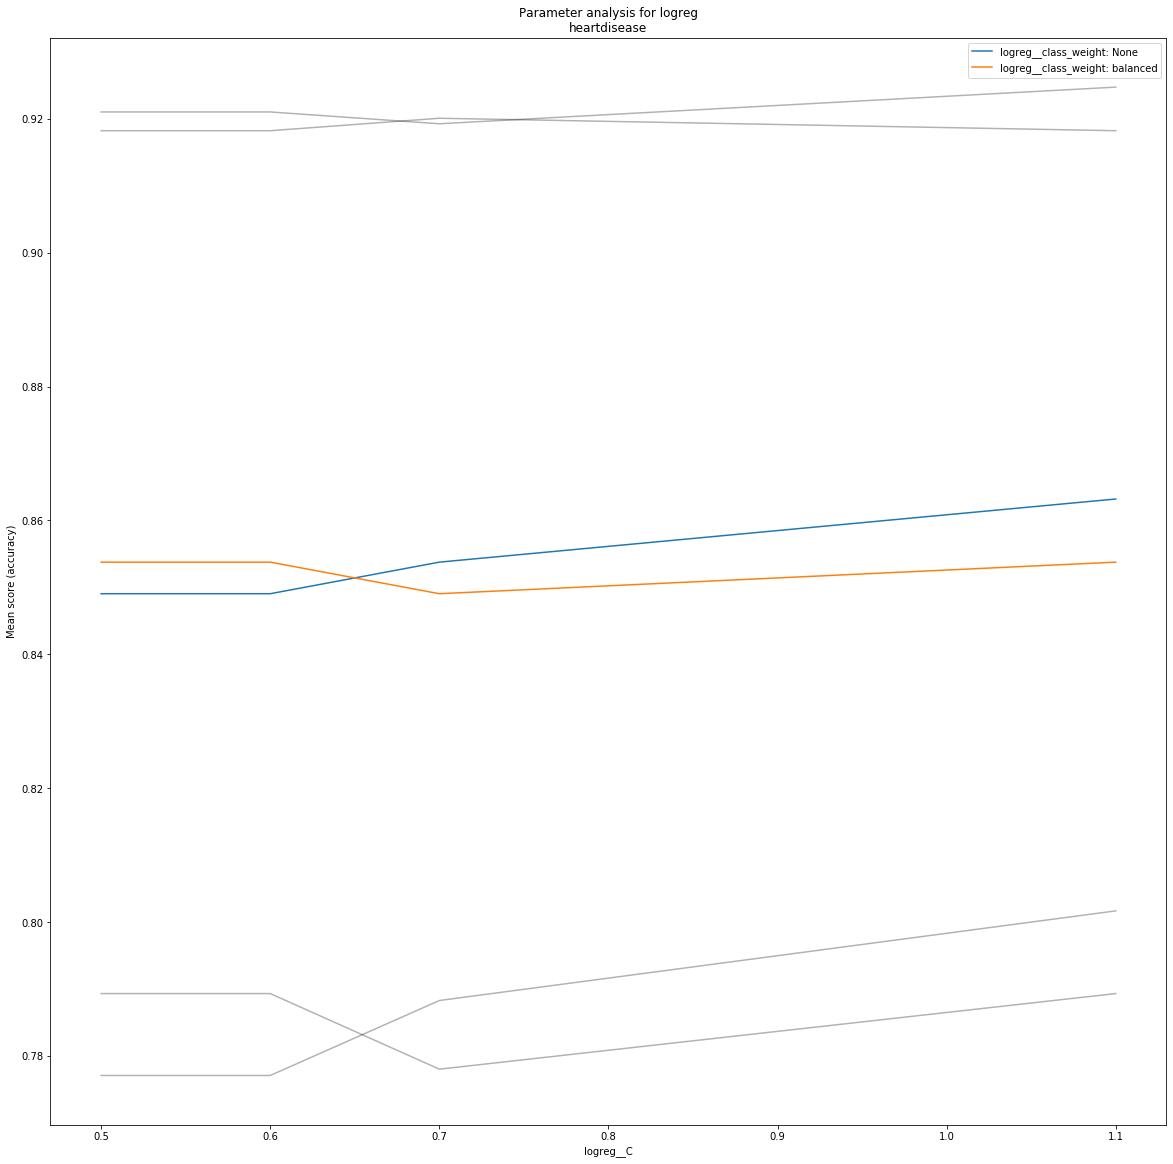

In [411]:
params_logreg_base = {}
plot_parameter_analysis(grid=grid_logreg, params=params_logreg, param1='logreg__C', 
                        param2='logreg__class_weight', params_base=params_logreg_base, 
                        method_name="logreg")

## KNN-Classifier
__Score history:__

|description | accuracy | macro avg | weighted avg |
|---------| -------- | --------- | ------------ |
| first try | 0.68 | 0.68, 0.67, 0.68 | 0.68, 0.68, 0.68 |
| with MinMaxScaler | 0.79 | 0.79, 0.78, 0.79 | 0.79, 0.79, 0.79 |
| with RobustScaler | 0.79 | 0.79, 0.78, 0.79 | 0.79, 0.79, 0.79 |
| one-hot encoded | 0.69 | 0.69, 0.69, 0.69 | 0.69, 0.69, 0.69 |
| with MinMaxScaler | 0.77 | 0.77, 0.77, 0.77 | 0.77, 0.77, 0.77 |
| with RobustScaler | 0.82 | 0.83, 0.82, 0.82 | 0.83, 0.82, 0.82 |



### KNN Parameters:

In [276]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import MinMaxScaler

In [579]:
pipe_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [580]:
params_knn = {
    'knn__n_neighbors': [x for x in range(1,50,2)],
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance']
}

In [581]:
grid_knn = GridSearchCV(estimator=pipe_knn,
    param_grid=params_knn,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1)

In [582]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'k

In [583]:
grid_knn.best_params_

{'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}

In [584]:
grid_knn.score(X_test, y_test) 

0.7912087912087912

In [585]:
y_pred_knn = grid_knn.predict(X_test)

In [586]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



In [529]:
print(confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)

[[29 12]
 [ 7 43]]


init (25, 2, 2)


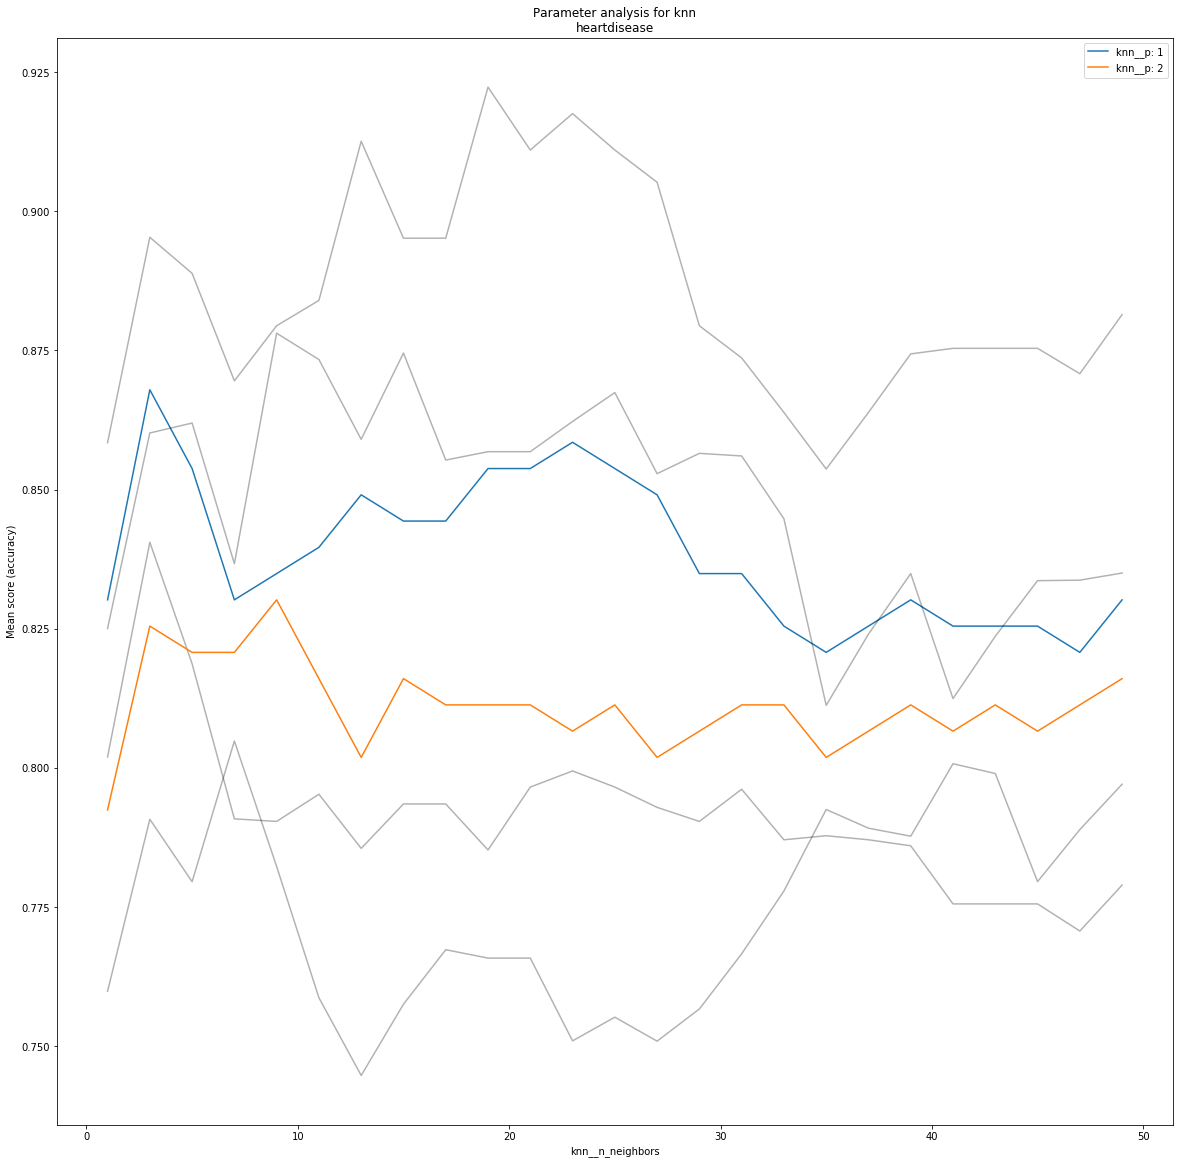

In [261]:
params_knn_base = {
    'knn__weights': ['uniform']
}
plot_parameter_analysis(grid=grid_knn, params=params_knn, param1='knn__n_neighbors', 
                        param2='knn__p', params_base=params_knn_base, 
                        method_name="knn")

## Random Forest
__Score history:__

|description | accuracy | macro avg | weighted avg |
|------------| -------- | --------- | ------------ |
| first try | 0.77 | 0.77, 0.76, 0.76 | 0.77, 0.77, 0.77 |
| recursive features selection | 0.81 | 0.81, 0.81, 0.81 | 0.81, 0.81, 0.81 |
| one-hot encoded | 0.79 | 0.80, 0.78, 0.78 | 0.80, 0.79, 0.79 |

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
pipe_rf = PipelineRFE([
    ('rf', RandomForestClassifier())
])

In [323]:
params_rf = {
    'rf__class_weight': [None, 'balanced'],
    'rf__max_depth': [None, 5, 7, 9, 10, 11, 13, 15, 20],
    'rf__max_leaf_nodes': [None, 5, 6, 7, 8, 9],
    'rf__min_samples_split': [2, 3, 4, 5, 6],
    'rf__n_estimators': [50, 200]
}

In [324]:
grid_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=params_rf,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1)

In [325]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  2.2min finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=PipelineRFE(memory=None,
                                   steps=[('rf',
                                           RandomForestClassifier(bootstrap=True,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,
                                                                  min_samp

In [326]:
grid_rf.best_params_

{'rf__class_weight': None,
 'rf__max_depth': None,
 'rf__max_leaf_nodes': None,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 200}

In [327]:
grid_rf.score(X_test, y_test)

0.7692307692307693

In [328]:
y_pred_rf = grid_rf.predict(X_test)

In [329]:
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



In [330]:
print(confusion_matrix(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)

[[29 12]
 [ 9 41]]


init (2, 9, 6, 5, 2)


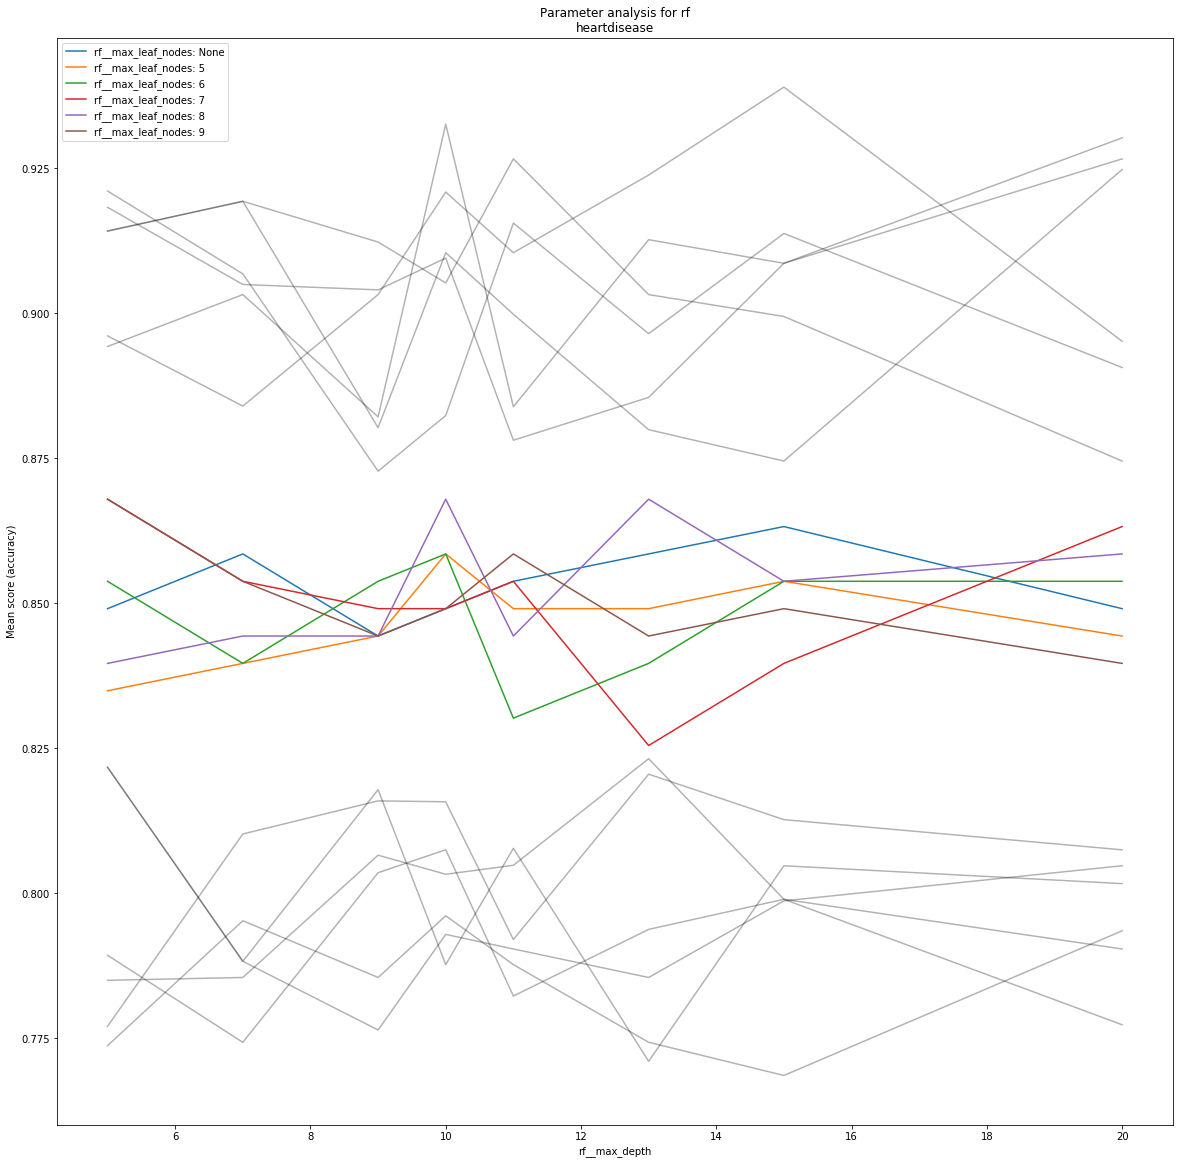

In [331]:
params_rf_base = {
    'rf__class_weight': [None],
    'rf__max_depth': [None, 5, 7, 9, 10, 11, 13, 15, 20],
    'rf__max_leaf_nodes': [None],
    'rf__min_samples_split': [2, 3, 4, 5, 6],
    'rf__n_estimators': [50]
}
plot_parameter_analysis(grid=grid_rf, params=params_rf, param1='rf__max_depth',
                        param2='rf__max_leaf_nodes', params_base=params_rf_base,
                        method_name='rf')

In [332]:
pipe_rf.set_params(**grid_rf.best_params_)
rfecv_rf = RFECV(estimator=pipe_rf, cv=3, scoring="accuracy")

In [333]:
rfecv_rf.fit(X_train, y_train)

RFECV(cv=3,
      estimator=PipelineRFE(memory=None,
                            steps=[('rf',
                                    RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                      

Optimal number of features : 11
Optimal features: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


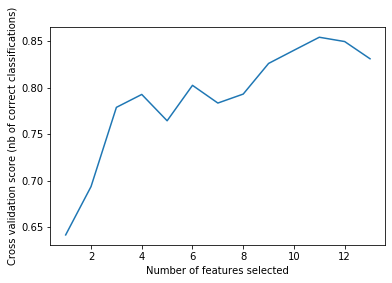

In [314]:
print("Optimal number of features : %d" % rfecv_rf.n_features_)
print("Optimal features: \n", heart_disease.columns[rfecv_rf.get_support(indices=True)])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_rf.grid_scores_) + 1), rfecv_rf.grid_scores_)
plt.show()

In [315]:
X_train_dropped_rf = X_train[:,rfecv_rf.get_support(indices=True)]
X_test_dropped_rf = X_test[:,rfecv_rf.get_support(indices=True)]
rfecv_rf.fit(X_train_dropped_rf, y_train)
y_pred_dropped_rf = rfecv_rf.predict(X_test_dropped_rf)

In [316]:
print(y_pred_dropped_rf.shape)
print(classification_report(y_test, y_pred_dropped_rf)) 

(91,)
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



## Creating a GradientBoostingClassifier
__Score history:__

|description | accuracy | macro avg | weighted avg |
|------------| -------- | --------- | ------------ |
| first try | 0.76 | 0.76, 0.75, 0.75 | 0.76, 0.76, 0.76 |
| recursive features selection | 0.79 | 0.79, 0.79, 0.79 | 0.79, 0.79, 0.79 |
| one-hot encoded | 0.78 | 0.78, 0.77, 0.77 | 0.78, 0.78, 0.78 |

In [419]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV

In [420]:
pipe_gbc = PipelineRFE([
    ('gbc', GradientBoostingClassifier())
])

In [421]:
params_gbc = {
    'gbc__learning_rate': [0.05, 0.1, 0.15, 0.3],
    'gbc__max_depth': [4, 5, 6, 7, 9],
    'gbc__max_features': ['log2'],
    'gbc__n_estimators': [100, 200]
}

In [422]:
grid_gbc = GridSearchCV(estimator=pipe_gbc,
    param_grid=params_gbc,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [423]:
grid_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.3s finished
/Users/moritzquotschalla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=PipelineRFE(memory=None,
                                   steps=[('gbc',
                                           GradientBoostingClassifier(criterion='friedman_mse',
                                                                      init=None,
                                                                      learning_rate=0.1,
                                                                      loss='deviance',
                                                                      max_depth=3,
                                                                      max_features=None,
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_impurity_split=None,
                                          

In [424]:
grid_gbc.best_params_

{'gbc__learning_rate': 0.1,
 'gbc__max_depth': 4,
 'gbc__max_features': 'log2',
 'gbc__n_estimators': 100}

In [425]:
grid_gbc.score(X_test, y_test)

0.7472527472527473

In [426]:
y_pred_gbc = grid_gbc.predict(X_test)

In [427]:
print(classification_report(y_test, y_pred_gbc)) 

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [428]:
print(confusion_matrix(y_test, y_pred_gbc))
cm = confusion_matrix(y_test, y_pred_gbc)

[[28 13]
 [10 40]]


init (4, 5, 1, 2)


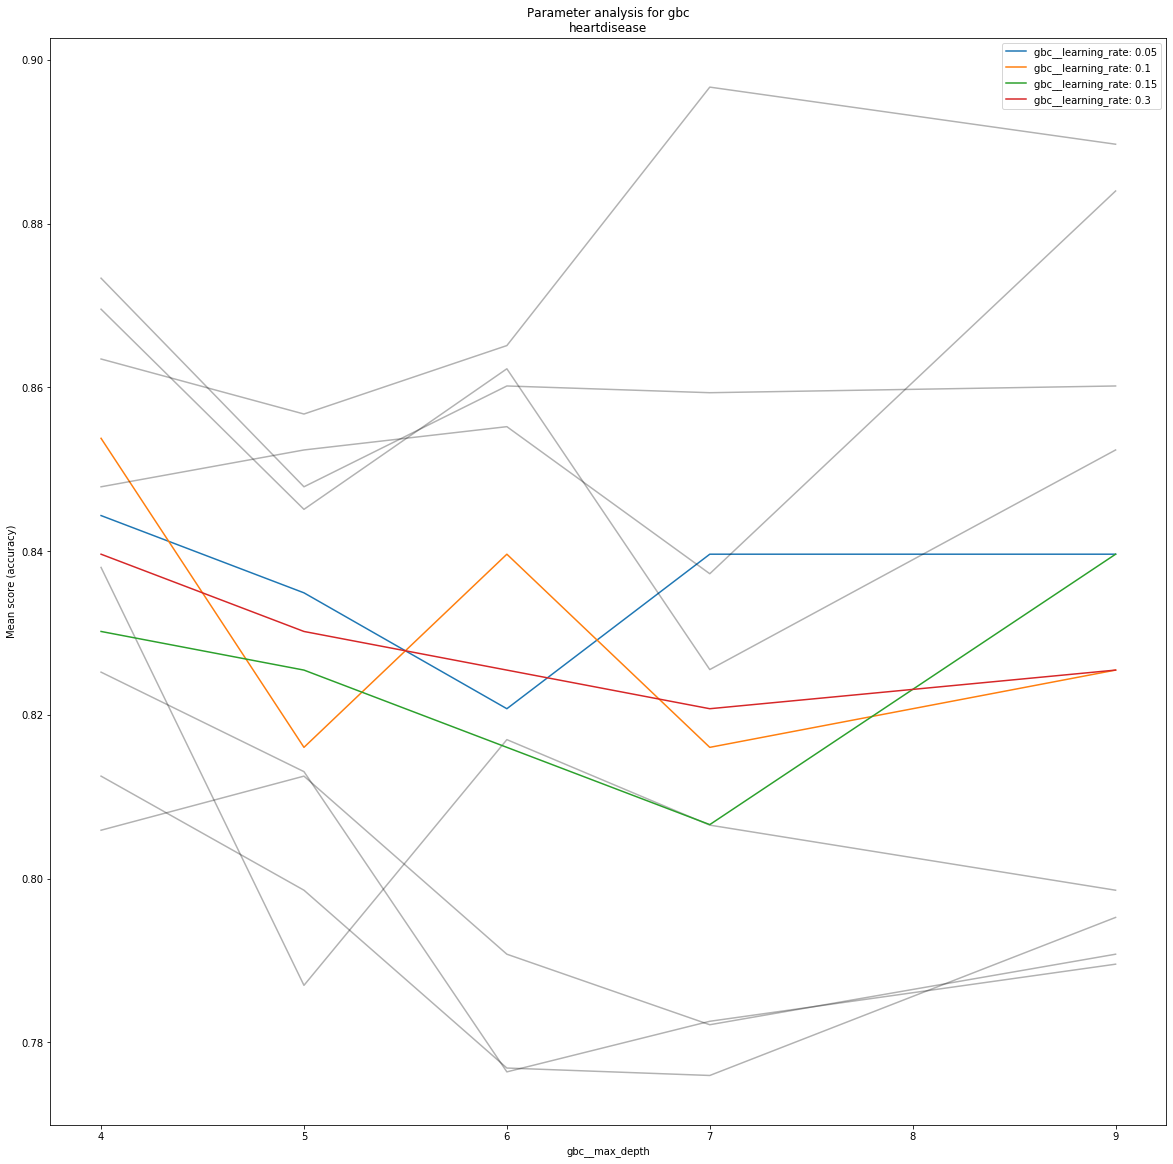

In [429]:
params_gbc_base = {
    'gbc__learning_rate': [0.05, 0.1, 0.15, 0.3],
    'gbc__max_depth': [4, 5, 6, 7, 9],
    'gbc__max_features': ['log2'],
    'gbc__n_estimators': [100]
}
plot_parameter_analysis(grid=grid_gbc, params=params_gbc, param1='gbc__max_depth',
                        param2='gbc__learning_rate', params_base=params_gbc_base,
                        method_name='gbc')

In [430]:
pipe_gbc.set_params(**grid_gbc.best_params_)
rfecv_gbc = RFECV(estimator=pipe_gbc, cv=3, scoring="accuracy")

In [431]:
rfecv_gbc.fit(X_train, y_train)

RFECV(cv=3,
      estimator=PipelineRFE(memory=None,
                            steps=[('gbc',
                                    GradientBoostingClassifier(criterion='friedman_mse',
                                                               init=None,
                                                               learning_rate=0.1,
                                                               loss='deviance',
                                                               max_depth=4,
                                                               max_features='log2',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples

Optimal number of features : 12
Optimal features: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


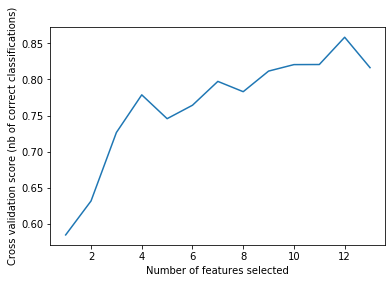

In [432]:
print("Optimal number of features : %d" % rfecv_gbc.n_features_)
print("Optimal features: \n", heart_disease.columns[rfecv_gbc.get_support(indices=True)])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_gbc.grid_scores_) + 1), rfecv_gbc.grid_scores_)
plt.show()

In [433]:
X_train_dropped_gbc = X_train[:,rfecv_gbc.get_support(indices=True)]
X_test_dropped_gbc = X_test[:,rfecv_gbc.get_support(indices=True)]
rfecv_gbc.fit(X_train_dropped_gbc, y_train)
y_pred_dropped_gbc = rfecv_gbc.predict(X_test_dropped_gbc)

In [434]:
print(y_pred_dropped_gbc.shape)
print(classification_report(y_test, y_pred_dropped_gbc))

(91,)
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        41
           1       0.75      0.86      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

